In [2]:
!pip install wget==3.2

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=1c4937868e6b43977d61f7a0d7e32ebb3490d4246300dadbe743f087f921f33d
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [3]:
import wget

wget.download(url='https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip', out='./dados.zip')


'./dados.zip'

In [4]:
import zipfile

with zipfile.ZipFile('./dados.zip', 'r') as fp:
  fp.extractall('./dados')

In [5]:
import os

os.rename('./dados/dow_jones_index.data', './dados/dow_jones_index.csv')

In [6]:
!pip install pandas==1.1.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 21.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pandas: filename=pandas-1.1.5-cp310-cp310-linux_x86_64.whl size=33263196 sha256=f24c96ac3226ad2701fc7f396f4a6edaf744ffabb948fcccd228980d100f128e
  Stored in directory: /root/.cache/pip/wheels/92/41/92/769e05cd303040fdae625c9f5a8d38f1d37c423aa2a30b3d0d
Successfully built pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires pandas>=1.3.0, but you have pandas 1.1.5 which is incompatible.
bigframes 0.24.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 1.1.5 w

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('./dados/dow_jones_index.csv')

In [18]:
# extração e tratamento dos dados da empresa Coca-Cola.

df_coca =df[df['stock'] == 'KO']


df_coca = df_coca[['date','open','high','low','close']]


df_coca.head(n=10)

,date,open,high,low,close
204,1/7/2011,$65.88,$65.88,$62.56,$62.92
205,1/14/2011,$62.70,$63.86,$62.56,$63.13
206,1/21/2011,$63.21,$63.92,$62.72,$62.77
207,1/28/2011,$62.87,$63.31,$62.14,$62.21
208,2/4/2011,$62.32,$63.48,$61.89,$62.56
209,2/11/2011,$62.67,$64.75,$62.32,$63.57
210,2/18/2011,$63.67,$64.72,$62.55,$64.55
211,2/25/2011,$63.36,$64.40,$63.33,$64.31
212,3/4/2011,$64.17,$65.87,$63.86,$65.21
213,3/11/2011,$65.32,$65.84,$64.47,$64.81


In [10]:
df_coca.dtypes

date     object
open     object
high     object
low      object
close    object
dtype: object

In [20]:
for cola in ['open', 'high', 'low', 'close']:
    df_coca[cola] = df_coca[cola].apply(lambda value: float(value.split(sep="$")[-1]))

In [12]:
!pip install seaborn==0.11.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [13]:
import seaborn as sns

<ipython-input-21-2c03b4361a85>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = plot.set_xticklabels(labels=df_coca['date'],rotation=90)


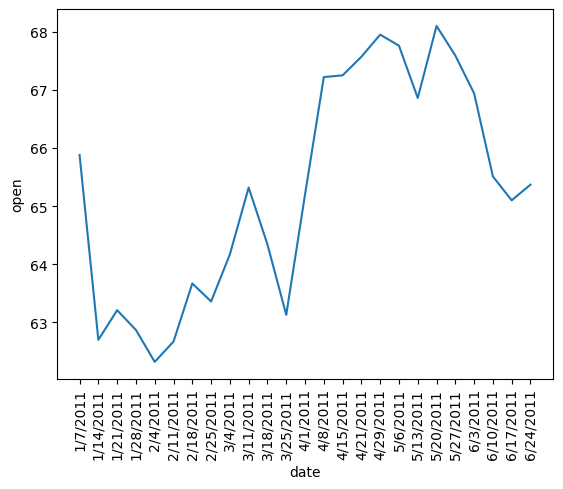

In [21]:
plot = sns.lineplot(x="date",y = "open", data=df_coca)
_ = plot.set_xticklabels(labels=df_coca['date'],rotation=90)